In [1]:
import sys

print(sys.version)

3.8.10 (default, May 19 2021, 11:01:55) 
[Clang 10.0.0 ]


# 상속과 조합이 차이점

- 상속은 자식클래스가 직접 부모 클래스의 멤버를 사용하는 것
- 조합은 사용하는 클래스가 특정 클래스의 기능을 위임해서 사용하는 것

# 1. Composition : 조합 또는 결합

- 다른 클래스의 일부 기능을 그대로 이용하고 싶으나, 전체 기능 상속은 피하고 싶을 때 사용 Composition 또는 Aggregation 이라고도 한다.
- 상속관계가 복잡할 경우, 코드 이해가 어려운 경우가 많음
   EX) B 에서 A의 객체의 메소드만 가져와서 사용

In [63]:
# 클래스를 함수로 바꿀 때,
# 정수는 값이 하나라서, 둘 중의 하나만 객체의 값으로 보관하면 된다.
def add(self,y) :
    return self._value + y

In [71]:
class ADD :
    def __init__(self, value1, value2) :
        self._value1 = value1
        self._value2 = value2
    
    # 객체가 실행되게 하기 위한 코드
    def __call__(self) :
        return self._value1 + self._value2

In [73]:
class sub :
    def __init__(self, value) :
        self._value = value
        
    def __call__(self, other) :
        return self._value - other

In [76]:
sub(500)(200)

300

In [77]:
ADD(100,200)()

300

In [52]:
def sub(self,y) :
    return self._value -y

In [53]:
# 이 클래스를 메소드로 가져오려면
class int :
    def __init__(self, value) :
        self._value = value
    
    add = add
    sub = sub

In [54]:
i = int(50)

In [55]:
i.add(100)

150

In [56]:
i.sub(20)

30

In [57]:
int.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.int.__init__(self, value)>,
              'add': <function __main__.add(self, y)>,
              'sub': <function __main__.sub(self, y)>,
              '__dict__': <attribute '__dict__' of 'int' objects>,
              '__weakref__': <attribute '__weakref__' of 'int' objects>,
              '__doc__': None})

## is a ( 상속관계 ), 다중상속

In [253]:
class P :
    def add(self):
        return self.x + self.y
 
    def subtract(self):
        print("P call")
        return self.x - self.y

In [254]:
class M :
    def multiply(self):
        return self.x * self.y
    
    # 부모클래스인 P와 M의 속성 중 같은 속성이 있을 시 (다중상속) : 
    def subtract(self):
        print("M call")
        return self.x - self.y

In [255]:
# Calc1 은 P와 M의 기능을 상속받는다.
# 1. 다중상속 중 원하는 상속자를 먼저 사용한다.
# ex) Calc1(M, P): 로 바꿔주면 된다.
class Calc1(P, M):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # 2. 다중상속 시 조건을 걸어서 실행되게 한다. 
    def subtract(self):
        if self.x <= 10 :
            # 10 이상이면 M 클래스를 상속받고,
            super().subtract()
        else:
            # 아니면 P 클래스를 상속받는다고 조건을 걸어줘야함.
            super(P,self).subtract()

In [263]:
super(Calc1,Calc1(10, 20)).__dict__

{'x': 10, 'y': 20}

In [262]:
Calc1.mro()

[__main__.Calc1, __main__.P, __main__.M, object]

In [256]:
c = Calc1(20, 200)

In [257]:
c.add()

220

In [258]:
c.subtract()

M call


In [259]:
c.multiply()

4000

In [79]:
class Calc:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def add(self):
        return self.x + self.y
 
    def subtract(self):
        return self.x - self.y
 

In [80]:
class Calc2:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def add(self):
        return self.x + self.y
 
    def multiply(self):
        print(" Calc2 multiply")
        return self.x * self.y

In [85]:
# 다른 클래스의 속성을 사용하고 싶으면 원하는 클래스의 객체에 접근해서 속성을 실행한다
# ex) Calc2.add() => Calc2의 add 함수속성을 가져와서 사용가능하다.
class Calc:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.calc2 = Calc2(x, y) # 해당 클래스의 객체를 명시적으로 가져옴
    
    def add(self):
        return self.x + self.y
 
    def subtract(self):
        return self.x - self.y
    
    # 실제로는 calc2의 데이터를 가져와서 사용한다.
    def multiply(self):
        return self.calc2.multiply() # 해당 클래스의 객체에 있는 메서드를 명시적으로 활용함

In [82]:
c = Calc(10,20)

In [83]:
c.__dict__['calc2'].__dict__

{'x': 10, 'y': 20}

In [84]:
c.multiply()

 Calc2 multiply


200

# 2. 덕 타이핑

- 파이썬은 별도의 인터페이스가 없다.
- 특정 메소드를 함수로 지정해서 다양한 객체를 전달해서 실행시키는 기법
- IT 적인 요건이 아니면 상속하지마라.


### 특정 인터페이스를 한정한다

In [335]:
# say라는 인터페이스를 호출하는 클래스가 두개가 있다.
# msg=None 은 들어오면 사용하고, 들어오지 않으면 사용하지 않는다.
def say(obj, msg, mat=None) :
    if type(obj) == A :
        return obj.say(msg, mat)
    else :
        return obj.say(mat)

#### 계좌 개설 예시 : 다양한 계좌를 하나의 이슈 함수로 셋팅시켜서 결과를 반환해주는 것.
#### 속성으로 기준하지 않고, 메소드를 기준으로 하는 이유? : 객체지향언어라서

### 여러 클래스에 한정된 함수에서 처리하는 메소드가 지정된다.

In [336]:
class A :
    def say(self, msg) :
        return " Hi " + msg + mat

In [337]:
class B :
    def say(self) :
        return " meow " + mat

### 객체를 생성해서 함수에 전달하면 메소드가 실행된다

In [338]:
a = A(); b=B()

In [339]:
say(a, "Hello", "Man~")

TypeError: say() takes 2 positional arguments but 3 were given

In [340]:
say(b, "Man~")

TypeError: say() takes 1 positional argument but 2 were given

# 3.  다중상속

- 보통 상위클래스를 부모클래스나 슈퍼 클래스라고 한다.
- 파이선은 여러 부모 클래스를 상속할 수 있다.


### 2개의 부모 클래스를 정의하고 상속한다.

In [7]:
class A:
    def x(self):
        print('x in A')

In [8]:
class B:
    def x(self):
        print('x in B')

In [9]:
class C(A, B): #
    def x(self, a, b):
        print('x in C', a, b)
        super(A, self).x() # super(C, self).x() # B.x()

In [10]:
c = C()

In [11]:
c.x(1, 2)

x in C 1 2
x in B


### 슈퍼 클래스는 상속한 관계보다 하나 앞선 클래스를 가져온다

- 슈퍼 클래스에 대한 상속도 순서가 있다.

In [12]:
C.__mro__

(__main__.C, __main__.A, __main__.B, object)

In [13]:
C.mro()

[__main__.C, __main__.A, __main__.B, object]

### super를 사용해서 해당 메소드를 참조한다.

- 부모 클래스의 접근할 때 super를 사용한다.
- mro의 위치를 찾아서 부모 클래스를 검색해서 처리한다.

In [14]:
super(C, c).x()

x in A


In [15]:
super(A, c).x()

x in B


# 4.  mixin

- 메소드만 있는 모든 클래스는 Mixin 이라는 관용적인 패턴으로 함수를 지정해준다.
- 믹스(메소드)인 속성을 가진 클래스를 만든다.
- 다른 클래스의 기능들을 다중 상속해서 가져온다. (이름으로 호출한다)
- 클래스에서 제공해야 하는 추가적인 메서드만 정의하는 작은 클래스
- 인스턴스 속성(attribue)를 정의하지 않으며 __init__생성자를 호출하도록 요구하지 않습니다
- 한 클래스에 대해 많은 선택 기능을 제공할때 사용함
- 많은 다른 클래스에서 하나의 특정 기능을 사용하려고 할때 사용함
- 클래스에서 상속받은 Mixin의 메소드를 포함하고 있는 것처럼 행동하는것이 믹스인의 핵심
- Mixin을 위한 특별한 키워드는 없으며, 단지 다중상속을 통해서 만들기 때문에 이 과정에서 문제가 생길 소지가 있음


## Mixin 과 Compositon의 차이점
- mixin은 IS-A를 의미합니다. B IS A (B는 A이다) (상속)
- Composition은 HAS-A를 의미합니다. B HAS A (B는 A를 가지고 있다) (조합)

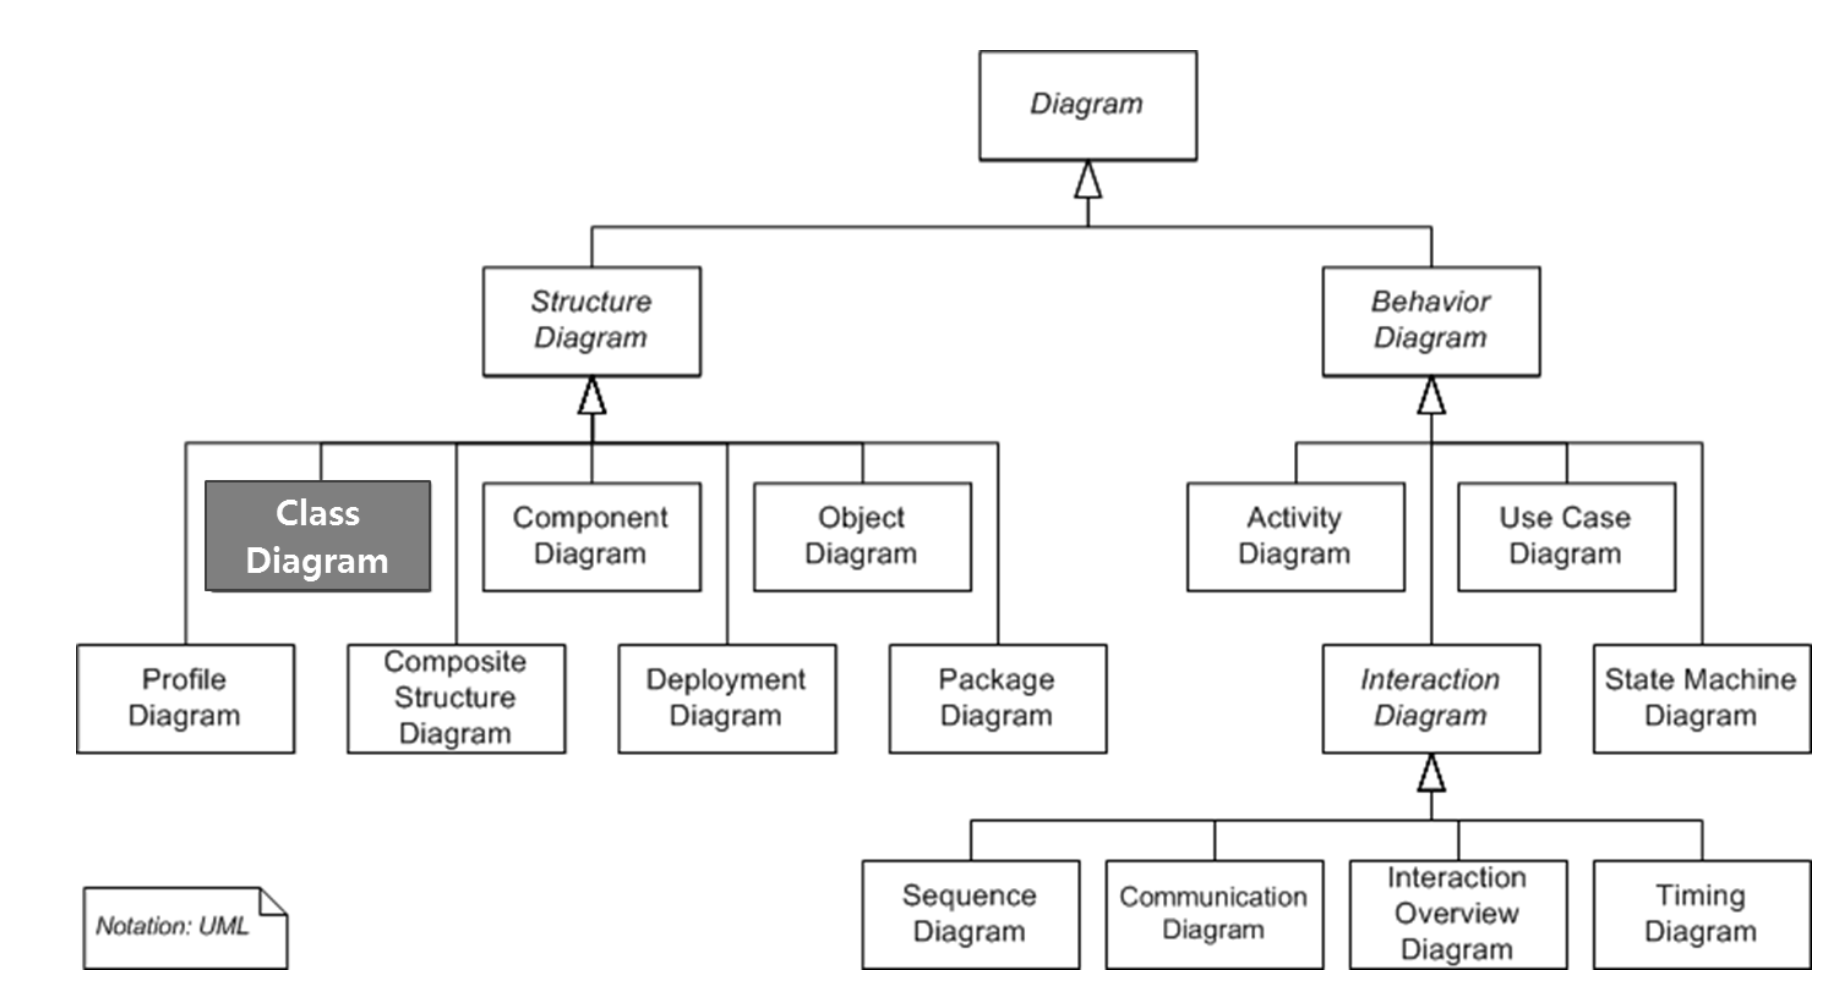

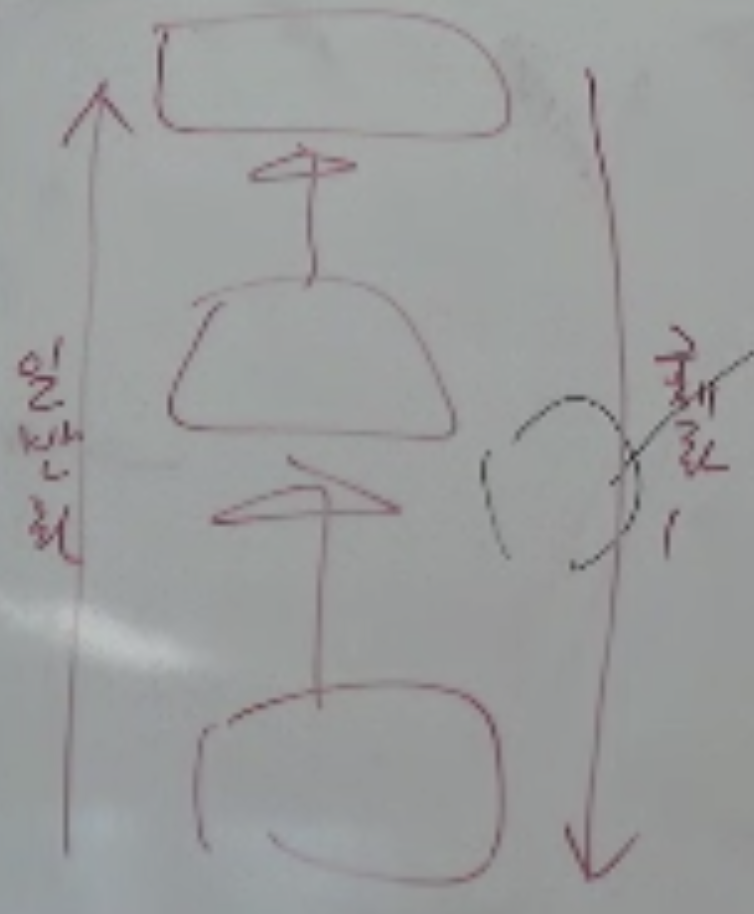

### 상위 클래스일 수록 일반화 되고, 하위 클래스일 수록 구체화 된다.

- 클래스의 일반화, 구체화를 구조적으로 설계해서 로직을 짜야한다.

### 클래스의 이름이 충돌하지 않는 상황에서 다중상속을 하려고 할 때, Mixin이 유용하다.
- 위의 다중상속과 같이 보도록하자.
- 로직을 못짜는 애가 데이터 구조를 만들어 놓는다.
- 그 다음 로직 짜는 애가 구조들을 합쳐서(다중상속) 사용한다. 다중상속을 위한 클래스를 만들때 Mixin 을 붙혀줘야 구별을 한다.
- 다중상속하는 함수는 Mixin을 붙혀주면서 다중상속 로직을 짤 때 용이하게 한다.

In [350]:
class AddMixin :
    def add(self):
        return self.x + self.y

In [351]:
class SubMixin :
    def sub(self):
        return self.x - self.y

In [352]:
class MulMixin :
    def mul(self):
        return self.x * self.y

In [357]:
class os(AddMixin, SubMixin, MulMixin):
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [358]:
i = os(10,20)

In [359]:
i.add(), i.sub(), i.mul()

(30, -10, 200)

## 메소드만 가진 두 개의 클래스 정의

In [341]:
class Mixin1 :
    def test(self):
        print("Mixin1")

class Mixin2 :
    def test1(self):
        print("Mixin2")


### 다중상속을 통해 믹스인 구성

In [346]:
# 다중상속시 사용하는데, 내 클래스에는 속성을 만들지 않고, 외부에 클래스(믹스인으로)를 만들어서 상속해서 사용한다.
class MyClass(Mixin1, Mixin2):
    pass

In [343]:
m = MyClass()

In [344]:
m.test()

Mixin1


In [345]:
m.test1()

Mixin2
